<a href="https://colab.research.google.com/github/dinuka125/japura-Git-Workshop/blob/master/predictions_with_lstm_LOLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')
path ='/content/drive/My Drive/csv_files/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np

data=np.load(path+'datalolc.npy')
target=np.load(path+'targetlolc.npy')

In [23]:
data.shape
target.shape

(2530,)

In [24]:
train_data=data[:1771]
train_target=target[:1771]

test_data=data[1771:]
test_target=target[1771:]

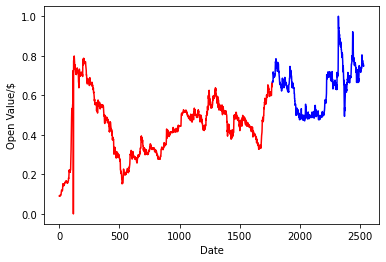

In [25]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1771,2530,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [26]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:])))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))

model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])

In [27]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.10)

Epoch 1/200
50/50 [==============================] - 14s 169ms/step - loss: 0.0433 - mse: 0.0433 - mae: 0.1403 - mape: 342405.2326 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0410 - val_mape: 8.1519
Epoch 2/200
50/50 [==============================] - 7s 140ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0409 - mape: 690415.9074 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0333 - val_mape: 7.4296
Epoch 3/200
50/50 [==============================] - 7s 139ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0374 - mape: 332695.4027 - val_loss: 0.0013 - val_mse: 0.0013 - val_mae: 0.0302 - val_mape: 6.6042
Epoch 4/200
50/50 [==============================] - 7s 141ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0402 - mape: 598530.1729 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0315 - val_mape: 6.1290
Epoch 5/200
50/50 [==============================] - 7s 141ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0358 - mape: 185065.8246 - val_loss: 9.7750e-04 - val_mse: 9.7750e-04 - val_ma

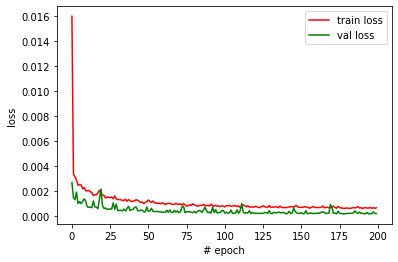

In [28]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)
print(result.shape)
print(test_target.shape)

r2 score: 0.9431700532457591
(759, 1)
(759,)


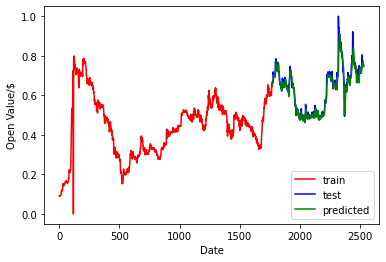

In [30]:
#test_x_range=np.arange(1000,1209,1)

test_x_range=np.arange(1771,2530,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

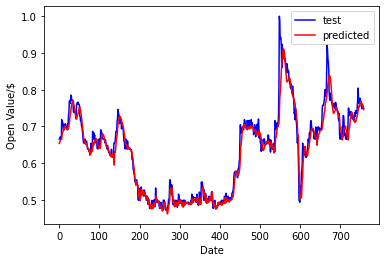

In [31]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'r',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [32]:
model.save_weights("JHK Stock Model new.h5")